# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Read and present data

In [2]:
preproc_filepath = ('/users/konstantinosvosinas/Desktop/PREP2025/vals_preproc.mat')
denoised_filepath = ('/users/konstantinosvosinas/Desktop/PREP2025/data/vals_denoised.mat')
def preprocess_data(filepath):
    data = loadmat(filepath)
    scan_names = [i[0][0] for i in data['vals'][0][0][0]]
    subjects = [f.split('_')[0] for f in scan_names]
    sample_rate = [0.8 if f.split('_')[1][4] == 'n' else 2 for f in scan_names]
    run_nos = [int(f.split('_')[2][4]) for f in scan_names]
    scans = [i[0] for i in data['vals'][0][0][1]]
    points = [len(i[0]) for i in data['vals'][0][0][1]]
    df = pd.DataFrame({'filename': scan_names, 'subject': subjects, 'run':run_nos, 'sample_rate':sample_rate, 'timepoints': points, 'scans': scans}).sort_values(by=['filename'], inplace=False)
    return df
data_df = preprocess_data(preproc_filepath)
data_df

,filename,subject,run,sample_rate,timepoints,scans
0,sub-53888_acq-p402rest0_run-1_desc-preproc_bol...,sub-53888,1,2.0,300,"[[877.0, 894.0, 862.0, 860.0, 798.0, 857.0, 92..."
1,sub-53888_acq-p402rest1_run-2_desc-preproc_bol...,sub-53888,2,2.0,300,"[[875.0, 879.0, 886.0, 861.0, 698.0, 873.0, 92..."
2,sub-53888_acq-p402rest2_run-3_desc-preproc_bol...,sub-53888,3,2.0,300,"[[862.0, 884.0, 875.0, 862.0, 694.0, 857.0, 91..."
3,sub-53888_acq-p402rest3_run-4_desc-preproc_bol...,sub-53888,4,2.0,300,"[[838.0, 842.0, 823.0, 830.0, 721.0, 840.0, 88..."
4,sub-53888_acq-p403rest0_run-5_desc-preproc_bol...,sub-53888,5,2.0,300,"[[912.0, 926.0, 886.0, 906.0, 838.0, 931.0, 97..."
...,...,...,...,...,...,...
130,sub-57214_acq-n0143rest1_run-2_desc-preproc_bo...,sub-57214,2,0.8,62,"[[2602.0, 3288.0, 4049.0, 2863.0, 3240.0, 2308..."
131,sub-57214_acq-n0143rest2_run-3_desc-preproc_bo...,sub-57214,3,0.8,750,"[[2573.0, 3244.0, 4044.0, 2812.0, 3482.0, 2275..."
132,sub-57214_acq-n0143rest3_run-4_desc-preproc_bo...,sub-57214,4,0.8,750,"[[2573.0, 3153.0, 3878.0, 2748.0, 2219.0, 2160..."
133,sub-57214_acq-n0143rest5_run-5_desc-preproc_bo...,sub-57214,5,0.8,750,"[[2439.0, 3162.0, 3697.0, 2678.0, 1940.0, 2094..."


In [3]:
def remove_mean_from_scans(df):
    df['scans'] = df['scans'].apply(lambda x: x - np.mean(x, axis=0))
    return df

data_df = remove_mean_from_scans(data_df)
data_df.head()

,filename,subject,run,sample_rate,timepoints,scans
0,sub-53888_acq-p402rest0_run-1_desc-preproc_bol...,sub-53888,1,2.0,300,"[[1.2733333333333121, 0.34333333333336213, -1...."
1,sub-53888_acq-p402rest1_run-2_desc-preproc_bol...,sub-53888,2,2.0,300,"[[5.373333333333335, 3.943333333333385, 2.0166..."
2,sub-53888_acq-p402rest2_run-3_desc-preproc_bol...,sub-53888,3,2.0,300,"[[8.779999999999973, 11.606666666666683, 8.313..."
3,sub-53888_acq-p402rest3_run-4_desc-preproc_bol...,sub-53888,4,2.0,300,"[[-1.5666666666667197, 0.57000000000005, 3.546..."
4,sub-53888_acq-p403rest0_run-5_desc-preproc_bol...,sub-53888,5,2.0,300,"[[-5.9500000000000455, -2.1499999999999773, -3..."


2.0


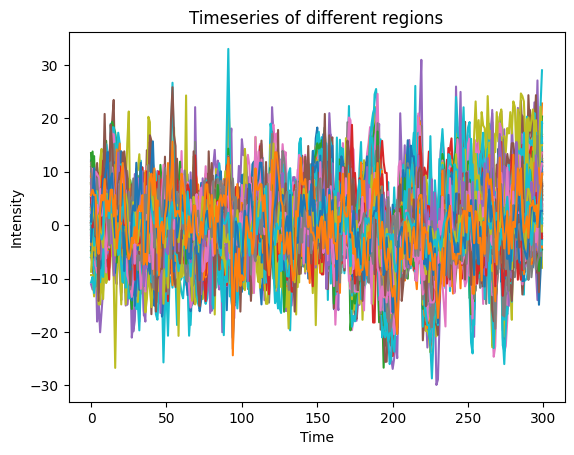

In [4]:
subject_0_data = data_df.iloc[0]['scans']
sample_rate = data_df.iloc[0]['sample_rate']
print(sample_rate)
plt.plot(subject_0_data)
plt.title('Timeseries of different regions')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()

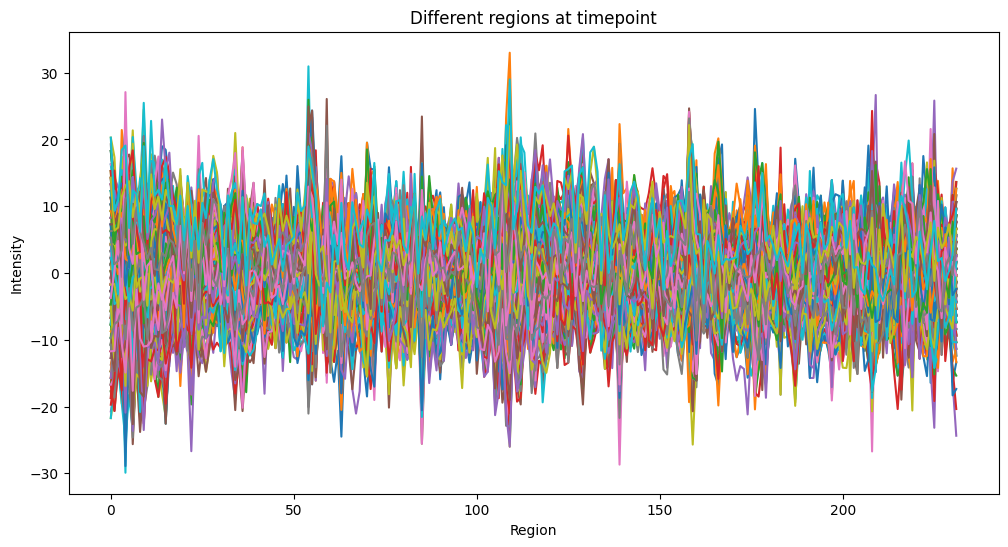

In [5]:
subject_0_data = data_df.iloc[0]['scans']
plt.figure(figsize=(12, 6))
for region in range(len(subject_0_data[:,12])):
    plt.plot(subject_0_data[region], label=f'Region {region+1}')
plt.title('Different regions at timepoint')
plt.xlabel('Region')
plt.ylabel('Intensity')
plt.show()

In [6]:
plt.plot(result_preproc['scans'][0][:,0])
plt.plot(result_preproc['scans'][0][:, 10])
plt.show()

NameError: name 'result_preproc' is not defined

In [7]:
run_counts = data_df['run'].value_counts()
print(run_counts)

run
1    28
2    27
3    27
4    26
5    23
6     2
7     1
8     1
Name: count, dtype: int64


In [9]:
data_df['num_timepoints'] = data_df['scans'].apply(lambda x: len(x[:,0]))
num_timepoints_per_individual = data_df.groupby('subject')['num_timepoints'].unique()
data_df.drop(columns=['num_timepoints'], inplace=True)

print("Number of scan timepoints per subject:\n", num_timepoints_per_individual)

Number of scan timepoints per subject:
 subject
sub-53888         [300]
sub-55162         [375]
sub-55729    [300, 101]
sub-55746         [300]
sub-55772         [300]
sub-55809         [375]
sub-55965         [300]
sub-55988         [300]
sub-55992         [300]
sub-56017         [375]
sub-56030         [300]
sub-56061         [300]
sub-56114         [300]
sub-56118         [300]
sub-56122         [300]
sub-56141         [300]
sub-56145         [300]
sub-56165         [300]
sub-56722         [375]
sub-56726         [375]
sub-56733         [375]
sub-57131     [57, 750]
sub-57132         [375]
sub-57140         [750]
sub-57142         [750]
sub-57193         [750]
sub-57214     [750, 62]
sub-57218         [750]
Name: num_timepoints, dtype: object


Outlier data, first one has very few points in the first run. Second has very few points in the second run, last one very few timepoints in the last run.

In [10]:
data_df[data_df['subject'] == 'sub-57131']

,filename,subject,run,sample_rate,timepoints,scans
103,sub-57131_acq-n0082rest0_run-1_desc-preproc_bo...,sub-57131,1,0.8,57,"[[2656.0, 3794.0, 4255.0, 2936.0, 1428.0, 2268..."
104,sub-57131_acq-n0082rest1_run-2_desc-preproc_bo...,sub-57131,2,0.8,750,"[[2656.0, 3758.0, 4258.0, 2955.0, 1304.0, 2282..."
105,sub-57131_acq-n0082rest2_run-3_desc-preproc_bo...,sub-57131,3,0.8,750,"[[2630.0, 3759.0, 4231.0, 2938.0, 2390.0, 2267..."
106,sub-57131_acq-n0082rest3_run-4_desc-preproc_bo...,sub-57131,4,0.8,750,"[[2566.0, 3730.0, 4099.0, 2884.0, 832.0, 2253...."
107,sub-57131_acq-n0082rest4_run-5_desc-preproc_bo...,sub-57131,5,0.8,750,"[[2680.0, 3767.0, 4476.0, 3076.0, 4099.0, 2347..."
108,sub-57131_acq-n0082rest5_run-6_desc-preproc_bo...,sub-57131,6,0.8,750,"[[2594.0, 3739.0, 4165.0, 2845.0, 1095.0, 2200..."


In [11]:
data_df[data_df['subject'] == 'sub-57214']

,filename,subject,run,sample_rate,timepoints,scans
129,sub-57214_acq-n0143rest0_run-1_desc-preproc_bo...,sub-57214,1,0.8,750,"[[2524.0, 3326.0, 4004.0, 2843.0, 3109.0, 2238..."
130,sub-57214_acq-n0143rest1_run-2_desc-preproc_bo...,sub-57214,2,0.8,62,"[[2602.0, 3288.0, 4049.0, 2863.0, 3240.0, 2308..."
131,sub-57214_acq-n0143rest2_run-3_desc-preproc_bo...,sub-57214,3,0.8,750,"[[2573.0, 3244.0, 4044.0, 2812.0, 3482.0, 2275..."
132,sub-57214_acq-n0143rest3_run-4_desc-preproc_bo...,sub-57214,4,0.8,750,"[[2573.0, 3153.0, 3878.0, 2748.0, 2219.0, 2160..."
133,sub-57214_acq-n0143rest5_run-5_desc-preproc_bo...,sub-57214,5,0.8,750,"[[2439.0, 3162.0, 3697.0, 2678.0, 1940.0, 2094..."


In [12]:
data_df[data_df['subject'] == 'sub-55729']

,filename,subject,run,sample_rate,timepoints,scans
10,sub-55729_acq-p417rest0_run-1_desc-preproc_bol...,sub-55729,1,2.0,300,"[[824.0, 833.0, 803.0, 813.0, 581.0, 804.0, 87..."
11,sub-55729_acq-p417rest1_run-2_desc-preproc_bol...,sub-55729,2,2.0,300,"[[915.0, 905.0, 879.0, 886.0, 674.0, 885.0, 94..."
12,sub-55729_acq-p417rest2_run-3_desc-preproc_bol...,sub-55729,3,2.0,300,"[[907.0, 895.0, 875.0, 891.0, 731.0, 889.0, 94..."
13,sub-55729_acq-p417rest3_run-4_desc-preproc_bol...,sub-55729,4,2.0,101,"[[891.0, 876.0, 859.0, 863.0, 670.0, 861.0, 91..."


# MVMD application

In [4]:
from mvmd.mvmd import mvmd
import os
import numpy as np
import scipy.io as sio
from tqdm import tqdm

In [5]:
Ks = range(6, 13)  
alphas = [500, 750, 1000, 1250, 1500]

def run_experiment_K(data_df, sample_rate, run_no, Ks, results_folder, alpha = 1000, tol = 1e-7):
    filtered_df = data_df[(data_df['sample_rate'] == sample_rate) & (data_df['run'] == run_no)].reset_index(drop=True)
    for K in tqdm(Ks):
        folder_name = f'{results_folder}/K_{K}'

        os.makedirs(folder_name, exist_ok=True)
        for i, row in filtered_df.iterrows():
            u, u_hat, omega = mvmd(row['scans'], num_modes=K, alpha=alpha, tolerance=tol, freq=row['sample_rate'])
            sio.savemat(os.path.join(folder_name, f'u_{row.subject}_{row.timepoints}.mat'), {'u': u})
            sio.savemat(os.path.join(folder_name, f'u_hat_{row.subject}_{row.timepoints}.mat'), {'u_hat': u_hat})
            sio.savemat(os.path.join(folder_name, f'omega_{row.subject}_{row.timepoints}.mat'), {'omega': omega})

def run_experiment_alpha(data_df, sample_rate, run_no, alphas, results_folder, K=10, tol = 1e-7):
    filtered_df = data_df[(data_df['sample_rate'] == sample_rate) & (data_df['run'] == run_no)].reset_index(drop=True)
    for alpha in tqdm(alphas):
        folder_name = f'{results_folder}/alpha_{alpha}'
        os.makedirs(folder_name, exist_ok=True)
        for i, row in filtered_df.iterrows():
            u, u_hat, omega = mvmd(row['scans'], num_modes=K, alpha=alpha, tolerance=tol, freq=row['sample_rate'])
            sio.savemat(os.path.join(folder_name, f'u_{row.subject}_{row.timepoints}.mat'), {'u': u})
            sio.savemat(os.path.join(folder_name, f'u_hat_{row.subject}_{row.timepoints}.mat'), {'u_hat': u_hat})
            sio.savemat(os.path.join(folder_name, f'omega_{row.subject}_{row.timepoints}.mat'), {'omega': omega})

In [11]:
run_experiment_alpha(data_df, 0.8, 1, alphas, './Results_0_mean/Results_run-0_800ms_/')

100%|██████████| 5/5 [56:25<00:00, 677.01s/it]


In [ ]:
run_experiment_K(data_df, 0.8, 1, alphas, './Results_0_mean/Results_run-0_800ms_/')

  0%|          | 0/5 [00:00<?, ?it/s]

In [16]:
filtered_df = data_df[(data_df['sample_rate'] == 0.8) & (data_df['run'] == 1)].reset_index(drop=True)
filtered_df

,filename,subject,run,sample_rate,timepoints,scans
0,sub-55162_acq-n0033rest0_run-1_desc-preproc_bo...,sub-55162,1,0.8,375,"[[2684.0, 3596.0, 4283.0, 3005.0, 1655.0, 2445..."
1,sub-55809_acq-n0043rest0_run-1_desc-preproc_bo...,sub-55809,1,0.8,375,"[[2381.0, 3270.0, 3351.0, 2611.0, 3322.0, 2134..."
2,sub-56017_acq-n0047rest0_run-1_desc-preproc_bo...,sub-56017,1,0.8,375,"[[2696.0, 3997.0, 4521.0, 3099.0, 4313.0, 2301..."
3,sub-56722_acq-n0045rest0_run-1_desc-preproc_bo...,sub-56722,1,0.8,375,"[[2934.0, 4461.0, 5289.0, 3288.0, 6557.0, 2454..."
4,sub-56726_acq-n0048rest0_run-1_desc-preproc_bo...,sub-56726,1,0.8,375,"[[2919.0, 4224.0, 4730.0, 3280.0, 6627.0, 2344..."
5,sub-56733_acq-n0035rest0_run-1_desc-preproc_bo...,sub-56733,1,0.8,375,"[[2986.0, 4743.0, 5365.0, 3453.0, 6932.0, 2544..."
6,sub-57131_acq-n0082rest0_run-1_desc-preproc_bo...,sub-57131,1,0.8,57,"[[2656.0, 3794.0, 4255.0, 2936.0, 1428.0, 2268..."
7,sub-57132_acq-n0078rest0_run-1_desc-preproc_bo...,sub-57132,1,0.8,375,"[[2788.0, 4107.0, 4542.0, 3100.0, 2100.0, 2393..."
8,sub-57140_acq-n0107rest0_run-1_desc-preproc_bo...,sub-57140,1,0.8,750,"[[2446.0, 3384.0, 3862.0, 2817.0, 1342.0, 2059..."
9,sub-57142_acq-n0085rest0_run-1_desc-preproc_bo...,sub-57142,1,0.8,750,"[[2736.0, 3884.0, 4857.0, 3033.0, 3364.0, 2281..."


In [133]:
alpha = 1000
tau = 0
K = 8
DC = 0
init = 0.5
tol = 1e-7
u, u_hat, omega = mvmd(filtered_df.loc[0]['scans'], num_modes=K, alpha=alpha, tolerance=tol, freq=filtered_df.loc[0]['sample_rate'])

In [142]:
for i, row in filtered_df.iterrows():
    
    print(row.subject)

sub-53888
sub-55729
sub-55746
sub-55772
sub-55965
sub-55988
sub-55992
sub-56030
sub-56061
sub-56114
sub-56118
sub-56122
sub-56141
sub-56145
sub-56165


In [144]:
alpha = 1000
tau = 0
Ks = range(6, 13)
DC = 0
init = 0.5
tol = 1e-7

num_subjects = len(filtered_df)
for K in tqdm(Ks):
    folder_name = f'./Results_run-0_800ms_/K_{K}'
    os.makedirs(folder_name, exist_ok=True)
    for i, row in filtered_df.iterrows():
        u, u_hat, omega = mvmd(row['scans'], num_modes=K, alpha=alpha, tolerance=tol, freq=row['sample_rate'])
        
        sio.savemat(os.path.join(folder_name, f'{row.subject}.mat'), {'u': u})
        sio.savemat(os.path.join(folder_name, f'{row.subject}.mat'), {'u_hat': u_hat})
        sio.savemat(os.path.join(folder_name, f'{row.subject}.mat'), {'omega': omega})

100%|██████████| 7/7 [1:16:16<00:00, 653.73s/it]


In [15]:
filtered_df_2 = data_df[(data_df['sample_rate'] == 2.0) & (data_df['run'] == 1)].reset_index(drop=True)
filtered_df_2

,filename,subject,run,sample_rate,timepoints,scans
0,sub-53888_acq-p402rest0_run-1_desc-preproc_bol...,sub-53888,1,2.0,300,"[[877.0, 894.0, 862.0, 860.0, 798.0, 857.0, 92..."
1,sub-55729_acq-p417rest0_run-1_desc-preproc_bol...,sub-55729,1,2.0,300,"[[824.0, 833.0, 803.0, 813.0, 581.0, 804.0, 87..."
2,sub-55746_acq-p430rest0_run-1_desc-preproc_bol...,sub-55746,1,2.0,300,"[[802.0, 778.0, 809.0, 777.0, 771.0, 809.0, 81..."
3,sub-55772_acq-p410rest0_run-1_desc-preproc_bol...,sub-55772,1,2.0,300,"[[781.0, 777.0, 767.0, 768.0, 408.0, 813.0, 73..."
4,sub-55965_acq-p435rest0_run-1_desc-preproc_bol...,sub-55965,1,2.0,300,"[[949.0, 950.0, 960.0, 942.0, 940.0, 899.0, 98..."
5,sub-55988_acq-p397rest0_run-1_desc-preproc_bol...,sub-55988,1,2.0,300,"[[878.0, 859.0, 828.0, 871.0, 305.0, 811.0, 88..."
6,sub-55992_acq-p381rest0_run-1_desc-preproc_bol...,sub-55992,1,2.0,300,"[[912.0, 931.0, 889.0, 914.0, 541.0, 880.0, 94..."
7,sub-56030_acq-p424rest0_run-1_desc-preproc_bol...,sub-56030,1,2.0,300,"[[892.0, 894.0, 854.0, 868.0, 329.0, 890.0, 72..."
8,sub-56061_acq-p387rest0_run-1_desc-preproc_bol...,sub-56061,1,2.0,300,"[[872.0, 878.0, 868.0, 894.0, 700.0, 885.0, 87..."
9,sub-56114_acq-p354rest0_run-1_desc-preproc_bol...,sub-56114,1,2.0,300,"[[756.0, 765.0, 770.0, 743.0, 459.0, 756.0, 70..."


In [7]:
alpha = 1000
tau = 0
Ks = range(6, 13)  
DC = 0
init = 0.5
tol = 1e-7

for K in tqdm(Ks):
    folder_name = f'./Results_run-0_2000ms_/K_{K}'
    os.makedirs(folder_name, exist_ok=True)
    for i, row in filtered_df_2.iterrows():
        u, u_hat, omega = mvmd(row['scans'], num_modes=K, alpha=alpha, tolerance=tol, freq=row['sample_rate'])
        
        sio.savemat(os.path.join(folder_name, f'{row.subject}_{row.timepoints}.mat'), {'u': u})
        sio.savemat(os.path.join(folder_name, f'{row.subject}_{row.timepoints}.mat'), {'u_hat': u_hat})
        sio.savemat(os.path.join(folder_name, f'{row.subject}_{row.timepoints}.mat'), {'omega': omega})

100%|██████████| 7/7 [1:53:11<00:00, 970.22s/it] 


In [5]:
Ks = range(6, 13)  
alphas = [500, 750, 1000, 1250, 1500]

In [6]:
run_experiment_alpha(data_df, 0.8, 1, alphas, './Results_run-0_800ms_/')

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [58:07<00:00, 697.40s/it]


In [6]:
run_experiment_alpha(data_df, 2.0, 1, alphas, './Results_run-0_2000ms_/')

100%|██████████| 5/5 [1:02:30<00:00, 750.09s/it]


In [ ]:
run_experiment_alpha(data_df, 2.0, 1, alphas, './Results_run-0_800ms_/')
run_experiment_K(data_df, 0.8, 1, range(6, 13), './Results_run-0_800ms_/', alpha = 1000, tol = 1e-7)
run_experiment_K(data_df, 2.0, 1, range(6, 13), './Results_run-0_2000ms_/', alpha = 1000, tol = 1e-7)

  0%|          | 0/5 [00:00<?, ?it/s]

 29%|██▊       | 2/7 [13:53<35:20, 424.09s/it]

In [8]:
run_experiment_K(data_df, 0.8, 1, range(6, 13), './Results_run-0_800ms_/', alpha = 1000, tol = 1e-7)
run_experiment_K(data_df, 2.0, 1, range(6, 13), './Results_run-0_2000ms_/', alpha = 1000, tol = 1e-7)

100%|██████████| 7/7 [1:53:56<00:00, 976.58s/it] 


Alpha experiments for run 0

In [13]:
alphas = [500, 750, 1000, 1250, 1500]
run_experiment_alpha(data_df, 0.8, 1, alphas, './Results_run-0_800ms_/')

100%|██████████| 5/5 [1:01:25<00:00, 737.09s/it]


In [15]:
run_experiment_alpha(data_df, 2.0, 1, alphas, './Results_run-0_2000ms_/')

100%|██████████| 5/5 [1:31:13<00:00, 1094.75s/it]


run 2

In [16]:
run_experiment_K(data_df, 0.8, 2, range(6, 13), './Results_run-1_800ms_/', alpha = 1000, tol = 1e-7)
run_experiment_K(data_df, 2.0, 2, range(6, 13), './Results_run-1_2000ms_/', alpha = 1000, tol = 1e-7)

100%|██████████| 7/7 [1:39:15<00:00, 850.83s/it] 


In [17]:
run_experiment_alpha(data_df, 0.8, 2, alphas, './Results_run-1_800ms_/')
run_experiment_alpha(data_df, 2.0, 2, alphas, './Results_run-1_2000ms_/')

100%|██████████| 5/5 [1:21:12<00:00, 974.50s/it]


run 3

In [18]:
run_experiment_K(data_df, 0.8, 3, range(6, 13), './Results_run-2_800ms_/', alpha = 1000, tol = 1e-7)
run_experiment_K(data_df, 2.0, 3, range(6, 13), './Results_run-2_2000ms_/', alpha = 1000, tol = 1e-7)

100%|██████████| 7/7 [1:52:51<00:00, 967.34s/it] 


In [19]:
run_experiment_alpha(data_df, 0.8, 3, alphas, './Results_run-2_800ms_/')
run_experiment_alpha(data_df, 2.0, 3, alphas, './Results_run-2_2000ms_/')

100%|██████████| 5/5 [1:32:13<00:00, 1106.69s/it]


run_4

In [20]:
run_experiment_K(data_df, 0.8, 4, range(6, 13), './Results_run-3_800ms_/', alpha = 1000, tol = 1e-7)
run_experiment_K(data_df, 2.0, 4, range(6, 13), './Results_run-3_2000ms_/', alpha = 1000, tol = 1e-7)

100%|██████████| 7/7 [1:47:23<00:00, 920.54s/it] 


In [ ]:
run_experiment_alpha(data_df, 0.8, 4, alphas, './Results_run-3_800ms_/')
run_experiment_alpha(data_df, 2.0, 4, alphas, './Results_run-3_2000ms_/')

  0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
alphas = [500, 750, 1000, 1250, 1500]
run_experiment_alpha(data_df, 2.0, 4, alphas, './Results_run-3_2000ms_/')

 60%|██████    | 3/5 [1:01:51<41:14, 1237.11s/it]


KeyboardInterrupt: 